# MNIST using PyTorch 

# 📚 Introduction 📚

<div style="border-radius: 10px; border: #710193 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
The <b>MNIST database</b> (<i>Modified National Institute of Standards and Technology database</i>) is a large database of <b>handwritten digits</b> that is commonly used for training various image processing systems. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.<br><br>
The original <b>black and white images</b> were normalized to fit into a <b>28x28 pixel</b> bounding box and anti-aliased, which introduced <b>grayscale levels</b>. The original MNIST database contains 60,000 training images and 10,000 testing images, but in this competition we are given <b>42,000 training images</b> (70%) and <b>18,000 testing images</b> (30%).<br><br>
This notebook is an improvement of <a href=https://www.kaggle.com/code/marcpaulo/sklearn-mlp>my first notebook</a> in which we trained a <b>MultiLayer Perceptron (MLP)</b> using <code>Sklearn</code>. An MLP model ignores the <i>spatial information</i> and structure inherent in two-dimensional images. It treats each pixel as a separate input feature, resulting in a flattened, one-dimensional representation of the image.<br><br>
    <b>In this notebook</b>, we address this problem by implementing <b>Convolutional Neural Networks</b>, which are able to process two-dimensional data (e.g. images). Here, we will use the <b><code>PyTorch</code></b> library, which is an <i>open-source</i> machine learning library for Python, developed primarily by <i>Facebook's AI Research lab (FAIR)</i>. It is widely used for various tasks in machine learning and deep learning, such as building and training <i>neural networks</i>.<br><br>
❓ <b>WHAT WILL WE DO</b> ❓
    <ul>
        <li> 🔎 <b>Read & preprocess the Data</b> 🔍:<br>
            - Read and explore the dataset.<br>- Check if there are <i>missing</i> values.<br> 
            - Check the <i>range</i> of pixel values.<br>- Visualize the data (Images).<br>- Check that the target is <i>balanced</i>.<br>- Apply the preprocessing steps before feeding the Network.</li><br>
        <li> 🏋️ <b>Create and Train your ConvNet</b> 🏋️:<br>
            - Change the format of the data (Numpy array) to the proper Pytorch format (Pytorch Tensor).<br>
            - Create your cusomizable CNN using PyTorch (our own <code>MyConvNet</code> class).<br>- Define the hyperparameters (<i>num_epochs</i>, <i>batch_size</i>, etc).<br>- Initialize the <i>Model</i>, the <i>optimizer</i>, and the <i>cost function</i>.<br>- Create the trainig loop and track the training and validation losses.<br>- Plot the metrics to detect <i>overfitting</i>.<br>- Compute and show the <i>Classification Report</i>: accuracy, f1, precision, recall.<br>- Display the <i>Confusion Matrix</i>.</li><br>
        <li> 🧐 <b>Visualize Misclassified Images</b> 🧐:<br>
            - Learn how to visualize the misclassified Images.<br>
            - Evaluate the performance of the model on images with more uncertainty.
        </li><br>
        <li> 👀 <b>Visualize Convolutional Filters</b> 👀:<br>
            - Learn how to plot the filters (learned weights) of your Convolutional Network.
    </ul><br>
📈 <b>LET'S GO!</b> 📉
</div>

In [3]:
## IMPORT THE NECESSARY PYTHON LIBRARIES

# Read & Preprocess Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create and Train your ConvNet [PyTorch]
from typing import Union, List, Tuple
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, \
    confusion_matrix, ConfusionMatrixDisplay

# 🔎 Read & Preprocess the Data 🔍

<div style="border-radius: 10px; border: #710193 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
In this section, we will use the well-known <code>Pandas</code> Python library to read the data from <code>.csv</code> files.<br><br>
We will visualize the <b>distribution of the pixel values</b> (histogram) using the <code>Seaborn</code> and <b>Matplotlib</b> Python libraries. We will also check that there are no <b>missing values</b>, and that the <b>target classes are balanced</b>. We will <b>visualize the images</b> by plotting one image from each class.<br><br>
The last part of this section consists of <b>preprocessing the data</b> before feeding an <b>ConvNet (CNN)</b> model:
    <ul>
        <li>⚙️ <b>SCALING</b> ⚙️: Scale the data by mapping the pixel values to the <b>[0,1] interval</b>, where the largest occuring data point (<code>255</code>) corresponds to the maximum value (<code>1</code>), and the smallest one (<code>0</code>) corresponds to the minimum value (<code>0</code>). <br><b>WHY?</b> Because <i>Newral Networks</i> can benefit from having input data with small values. This encourages <i>numerical stability</i>, <i>gradient descent convergence</i>, <i>activation function sensitivity</i>, etc.</li>
    </ul>
</div>

<div class="alert alert-block alert-warning">
<b>NOTE:</b>
 I copied this first section <b>"Read & Process Data"</b> from <a href=https://www.kaggle.com/code/marcpaulo/sklearn-mlp>my first notebook</a> because the steps to follow are the same.
 </div>

In [6]:
# Read the data files using Pandas
df_train = pd.read_csv('../Data/mnist/train.csv')
df_test =  pd.read_csv('../Data/mnist//test.csv')

In [7]:
# Check the size of the train and test DataFrames
print("df_train shape:", df_train.shape)
print("df_test shape: ", df_test.shape)

df_train shape: (42000, 785)
df_test shape:  (28000, 784)


In [8]:
# Fortunately there are no missing values in our data
print(
    "Missing values in df_train: ", \
    df_train.isna().sum().sum()
)
print(
    "Missing values in df_test: ", \
    df_test.isna().sum().sum()
)

Missing values in df_train:  0
Missing values in df_test:  0


In [9]:
# Let's have a look at the first five training rows
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# We can see that the first colum is the label,
# and the rest of the columns are the 784 pixels
# that represent 28x28 gray-scale images.
# Let's extract the training images (X) and 
# the trainig targets (y)

X_train_original = df_train.drop(columns=['label']).values
X_train = X_train_original.reshape(42000, 28, 28)

y_train = df_train['label'].values

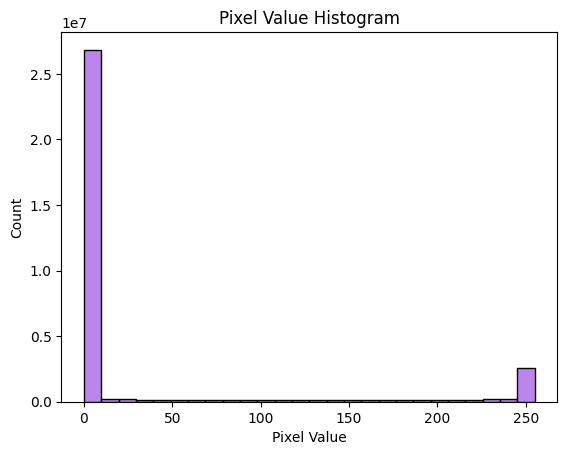

In [11]:
# Let's visualize the distribution of the pixel values

ax = sns.histplot(
    x=X_train_original.flatten(), 
    color='#A45EE5'
)
_ = ax.set(
    title='Pixel Value Histogram', xlabel='Pixel Value'
)

# As we can see, the 0 value represents the background
# and the >0 values represent the digits in the images

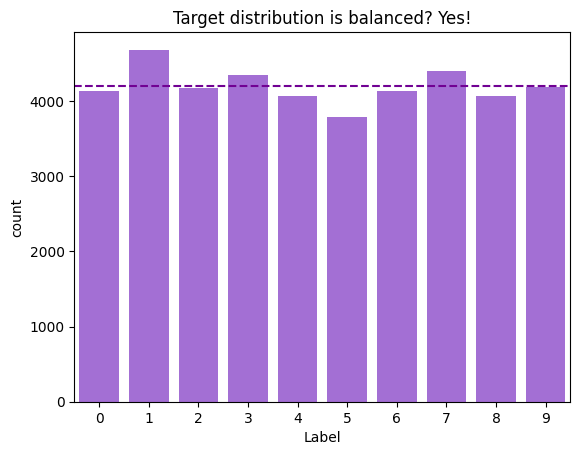

In [12]:
# Let's check that the target is balances.
# It means that the ten categories in the target
# have roughly the same representation in the data.

ax = sns.countplot(x=y_train, color='#A45EE5')
ax.set(
    title='Target distribution is balanced? Yes!',
    xlabel='Label'
)
# The expected number of samples for a balanced 
# class distribution is 42000/10 = 4200
ax.axhline(y=4200, color='#710193', linestyle='--')

# Since the target classes are balances, we don't have
# worry about sampling methods and biases in our models.

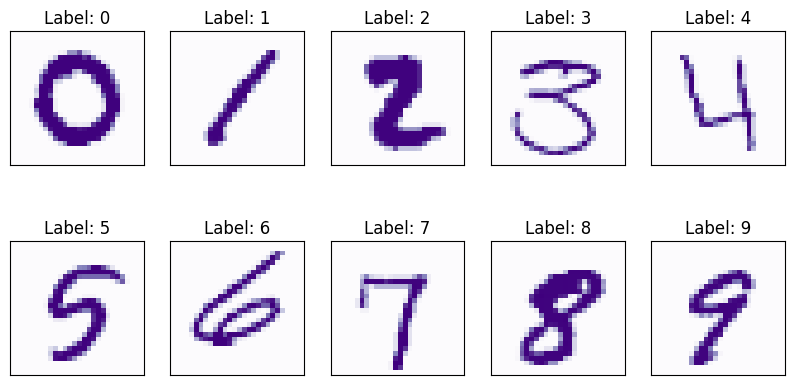

In [13]:
# Next, let's visualize one image from each class.
# We will use the matplotlib 'imshow' function.

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,5))

for i in range(10):
    idx = np.where(y_train==i)[0][0]
    img = axs[int(i >= 5), i%5].imshow(
        X=X_train[idx], cmap='Purples'
    )
    img.axes.get_yaxis().set_visible(False)
    img.axes.get_xaxis().set_visible(False)
    img.axes.set_title(f'Label: {i}')

In [14]:
# Finally, let's preprocess the data (scaling) 
# before feeding the Convolutional Networks:

X_min, X_max = X_train_original.min(), X_train_original.max()
X_train = (X_train - X_min) / (X_max - X_min)  # scaling
print("After applying Min-Max Scaler:")
print("  - New minimum value:", X_train.min())
print("  - New maximum value:", X_train.max())

After applying Min-Max Scaler:
  - New minimum value: 0.0
  - New maximum value: 1.0


# 🏋️ Create and Train your ConvNet 🏋️

<div style="border-radius: 10px; border: #710193 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    In this section, we will implement all the steps to <b>train a Neural Network using <code>PyTorch</code></b>. <br><br>
    First of all, we will define the training <b>Hyperparameters</b> and the <b>device</b> (CPU or GPU). Then, we will turn the data into the right format to feed a Pytorch Module. So far, our data are <code>Numpy Arrays</code> or <code>Pandas DataFrame</code>, but Pytorch requieres a special data type called <code>PyTorch Tensor</code> (more details below). The data preparation ends when we have the training data in a <code>PyTorch DataLoader</code> and the validation data as <code>PyTorch Tensors</code>.<br><br>
Once the data is ready, we introduce <b>our own <code>MyConvNet</code> class</b> to create and customize <i>Convolutional Neural Networks</i> using PyTorch. The architecture of the model is specified when the model is initialize. Refer to the class docstrings to understand how to use it (there is also a brief introduction below).<br><br>
    Finally, we define the <i>Cost Function</i> to minimize: <b>Cross-Entropy Loss</b> (a.k.a <i>Logarithmic Loss</i>) for this multiclass classification task, and we initialize the <b>Adam Optimizer</b> as well. The last step is to implement the <b>Training Loop</b> and track the training and validation losses throughout the training process. When the training is done, we perform some <i>visual analysis</i> by displaying the <b>Confusion Matrix</b> and the <b>Classification Report</b> (using the <code>Sklearn</code> library).<br><br>

🔝 <b>Our own <code>MyConvNet</code> class</b> 🔝:<br>
    <ul>
<li> In this section, we provide you with a Python Class that serves as a Pytorch Module which can be customized. You will be able to define the architecture of the model (its layers) when you initialize it. Refer to the dosctrings and comments of the Class to understand how to use it. There are two main parameters:<br><br>
    <ul>
        <li><code>conv_block</code>: represents the convolutional layers (and their <i>activation functions</i> or <i>poolings</i>)<br>The two-dimensional convolutional layers are given as a tuple <code>(int, int)</code> that represents the <code>(kernel_size, out_channels)</code> of that layer (no padding). The string <code>'max_pool'</code> represents a 2x2 Max Pooling Layer. The available activation functions are given as strings <code>'relu'</code> or <code>'tanh'</code>.</li><br>
            <li><code>fc_block</code>: represents the fully-connected layers (and their <i>activation functions</i>).<br>The fully-connected layers are given as a <code>int</code> that represents the number of units for that layer. The available activation functions are given as strings <code>'relu'</code> or <code>'tanh'</code>.
    </ul><br>If you like this implementation, feel free to use it in your Data Science Projects! :)</li></ul><br><br>
    
 🔜 <b>Beyond the scope of this Notebook</b> 🔜:<br>
        <ul>
            <li><b>Hyperarameter Optimization</b>: you can use techniques like <i>Grid search</i>, <i>Random Search</i>, or more advanced methods like <i>Bayesian Optimization</i>.
            </li>
    </ul>
</div>

In [15]:
# First of all, let's define the Training Hyperparameters

hparams = {
    # Define the MyConvNet architecture:
    'conv_block': [
        (3, 16), 'relu', 'max_pool',
        (3, 32), 'relu', 'max_pool',
    ],
    'fc_block': [64, 'relu', 10],  # last layer = n_classes
    # (to understand these values, read the 
    # documentation of the MyConvNet class below)
    
    # Optimizer (Adam):
    'learning_rate': 5e-4,
    'weight_decay': 1e-4,
    
    # Training Loop:
    'num_epochs': 10,
    'batch_size': 64,
    'display_info_every': 150,  # weight updates
    'compute_valid_loss_every': 150, # weight updates
}

In [16]:
# In PyTorch, the term "device" refers to the hardware 
# on which Tensors (the primary data structure in PyTorch)
# are stored and operated upon. 

# The two main types of devices are:
# - CPU (Central Processing Unit): 
#     The device by default.
# - CUDA-enabled GPU (Graphics Processing Unit): 
#     It significantly speeds up certain Deep Learning operations.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [17]:
# PyTorch uses a special data type called Tensors.
# Tensors are a fundamental data structure 
# used in PyTorch for representing and manipulating data.

# Turn the Numpy training data into Pytorch Tensors
tensor_X_train = torch.tensor(
    data=X_train, dtype=torch.float, device=device
)
tensor_X_train = tensor_X_train.unsqueeze(dim=1)
# '.unsqueeze(dim=1)' is used to add the 'channel' dimension
# In gray-scale images, the number of channels is 1
print('Torch Training Features, shape =', tensor_X_train.shape)
# A batch of images has size [batch_size, n_channels, width, height]

tensor_y_train = torch.tensor(
    data=y_train, dtype=torch.long, device=device
)
print('Torch Training Target, shape =', tensor_y_train.shape)

Torch Training Features, shape = torch.Size([42000, 1, 28, 28])
Torch Training Target, shape = torch.Size([42000])


In [18]:
# So far, we have encoded the Images (X) and Labels (y) 
# as two different Pytorch Tensors. Now, let's crate
# a PyTorch Dataset that will contain both tensors.

# Create a Pytroch Dataset: create pairs of (X,y) samples
train_dataset = torch.utils.data.TensorDataset(
    tensor_X_train, tensor_y_train
)

print('Train Data length =', len(train_dataset))
print('The first (X,y) pair, X shape =', train_dataset[0][0].shape)
print('The first (X,y) pair, y =', train_dataset[0][1].item())

Train Data length = 42000
The first (X,y) pair, X shape = torch.Size([1, 28, 28])
The first (X,y) pair, y = 1


In [19]:
# Now, we will split the entire Training dataset into
# two subsets: Training subset and Validation subset
# Since our MNIST is a large dataset (42000 training samples),
# it is enough to keep just the 10% (4200 samples) as the
# validation subset (we would also be fine with a 95-5% split)

train_subset, valid_subset = torch.utils.data.random_split(
    dataset=train_dataset,  # dataset to split
    lengths=[0.9, 0.1], # 90% training subset, 10% validation subset
)

print(f'Training subset: {len(train_subset.indices)} samples')
print(f'Validation subset: {len(valid_subset.indices)} samples')

Training subset: 37800 samples
Validation subset: 4200 samples


In [20]:
# Dataset vs. DataLoader:
# - A Dataset stores the samples and their corresponding labels
# - A DataLoader wraps an iterable around the Dataset to enable
#   easy access to the samples.

# Before implementing the Training Loop, let's first wrap our
# Pytorch Dataset in a Pytorch DataLoader that will yield batches
# of training samples (batch_size)

train_loader = torch.utils.data.DataLoader(
    dataset=train_subset,
    batch_size=hparams['batch_size'],
    shuffle=True,
)

# We will not create a valid_loader for the Validation Subset
# because to validate the model we will feed it with the 
# entire validation subset (just one batch). However, we have
# to separate the validation images (X) and their labels (y)
X_valid, y_valid = zip(*valid_subset)

# Let's turn them into the right format (Tensors)
X_valid = torch.stack(X_valid)
y_valid = torch.tensor(
    data=y_valid, dtype=torch.long, device=device
)

In [21]:
# Once the data is ready, let's create the Neural Network model.
# Here we provide you with a Python Class that serves as a
# Pytorch Module which can be customized (the architecture
# is not fixed). 

# Feel free to use this Class in your Data Science Projects! :)


class MyConvNet(nn.Module):
    """
    MyConvNet: 
        A customizable Convolutional Neural Network using PyTorch.
        Architecture: a Conv Block followed by a Fully-Conn block.

    Attributes:
        - conv_block (nn.Sequential): 
            Sequential container for convolutional layers.
        - fc_block (nn.Sequential): 
            Sequential container for fully connected layers.
        - input_shape (Tuple[int, int]): 
            Input shape of the data (width, height).

    Methods:
        - forward(x: torch.Tensor) -> torch.Tensor: 
            Forward pass through the network (conv_block + fc_block)

    Static Methods:
        - _get_activation(layer_: str) -> nn.Module: 
            Returns the activation function based on the provided string.
    """

    # '(<int>,<int>)' represents the (kernel_size, out_channels) of a ConvLayer
    available_conv_layers = ('(<int>,<int>)', 'relu', 'tanh', 'max_pool')
    # '<int>' represents the number of units in a Fully-Connected Layer
    available_fc_layers = ('<int>', 'relu', 'tanh')
    
    
    def __init__(
            self, 
            conv_block: List[Union[Tuple[int, int], str]],
            fc_block: List[Tuple[int]],
            input_shape: Tuple[int, int] = (28, 28),
            n_classes: int = 10
    ) -> None:
        """
        Initialize the MyConvNet model.

        Args:
            conv_block: List describing the convolutional layers.
            fc_block: List describing the fully connected layers.
            input_shape: Input shape of the data. Default is (28, 28).
            n_classes: number of different classes (classification)
        Raises:
            ValueError: If any of the provided blocks is not available.
        """

        super(MyConvNet, self).__init__()
        
        # Check that the output is one neuron per class (n_classes),
        # without activation function
        if fc_block[-1] != n_classes:
            raise ValueError(
                f'Last layer in fc_block must be n_classes ({n_classes}) '
                f'but {fc_block[-1]} was found instead.'
            )
        
        # Set the input shape, including the channel dimension
        self.input_shape = (1, *input_shape)
        
        # Initialize the convolutional layers
        self.conv_block = nn.Sequential()
        in_channels = 1  # gray-scale images
    
        for layer in conv_block:
            if isinstance(layer, str):
                if layer.lower() == 'max_pool':
                    pooling = torch.nn.MaxPool2d(kernel_size=2)
                    self.conv_block.append(pooling)
                else:  # Activation Layer (tanh or relu)
                    activation = self._get_activation(layer_=layer)
                    self.conv_block.append(activation)
            elif isinstance(layer, (list, tuple)) and len(layer) == 2:
                # 2D convolutional layer = (out_channels, kernel_size)
                self.conv_block.append(
                    nn.Conv2d(
                        in_channels=in_channels, 
                        out_channels=layer[1],
                        kernel_size=layer[0],
                        padding=0  # padding is zero for all conv layers
                    )
                )
                in_channels = layer[1]  # update current number of channels
            else:
                raise ValueError(
                    f'{layer}, wrong convolutional layer in conv_block. '
                    f'Expected one of {self.available_conv_layers}'
                )
                
        # Compute the number of input features of the first FullyConn layer
        with torch.no_grad():
            conv_out = self.conv_block(
                torch.zeros((1, *self.input_shape))
            )
            in_features = torch.prod(torch.tensor(conv_out.shape)).item()
        
        # Initialize the fully-connected layers
        # Append the to the fully-connected block
        self.fc_block = nn.Sequential()

        for layer in fc_block:
            if isinstance(layer, str):
                # Activation Layer
                activation = self._get_activation(layer_=layer)
                self.fc_block.append(activation)
            elif isinstance(layer, int):
                # Fully Connected Layer
                self.fc_block.append(
                    nn.Linear(
                        in_features=in_features, 
                        out_features=layer
                    )
                )
                # update the current number of hidden neurons
                in_features = layer
            else:
                raise ValueError(
                    f'{layer}, wrong Fully-Connected layer in fc_block. '
                    f'Expected one of {self.available_fc_layers}'
                ) 
    
    @staticmethod
    def _get_activation(layer_: str) -> nn.Module:
        """
        Returns the activation function based on the provided string.
        Available modules: ['relu', 'tanh']

        Args:
            layer_: String representation of the activation function.

        Returns:
            nn.Module: Activation function (module).

        Raises:
            ValueError: If the provided activation function is not available.
        """

        if 'relu' == layer_.lower():
            return nn.ReLU()
        elif 'tanh' == layer_.lower():
            return nn.Tanh()
        else:
            raise ValueError(
                f'{layer_} activation function is not available'
            )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the network. Note that 
        no activation function is applied to the final output.

        Args:
            x: Input data (batch of images).

        Returns:
            torch.Tensor: Output of the network.
        """

        out = self.conv_block(x)
        out = torch.flatten(out, start_dim=1)
        out = self.fc_block(out)
        return out

In [22]:
# Initialize a MyConvNet instance
# (You may want to experiment with different configurations!)

# Initialize a MyConvNet instance
conv_net = MyConvNet(
    conv_block=hparams['conv_block'],
    fc_block=hparams['fc_block']
).to(device)

conv_net  # display the sequence of layers

MyConvNet(
  (conv_block): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_block): Sequential(
    (0): Linear(in_features=800, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [23]:
# Define Loss Function: Cross-Entropy Loss.
#   Each predicted class probability is compared to 
#   the actual class desired output 0 or 1 and a 'loss'
#   is calculated that penalizes the probability based on
#   how far it is from the actual expected value.
#   (It is also called Logarithmic loss)
criterion = nn.CrossEntropyLoss()
print('Criterion =', criterion)
print()

# Define the Optimizer: Adam.
#   It is a stochastic gradient descent (SGD) method
#   that is based on adaptive estimation of first-order
#   and second-order moments.
optimizer = torch.optim.Adam(
    params=conv_net.parameters(),
    lr=hparams['learning_rate'],
    weight_decay=hparams['weight_decay'],  # L2 regularization
)
print('Optimizer =', optimizer)

Criterion = CrossEntropyLoss()

Optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0005
    maximize: False
    weight_decay: 0.0001
)


In [24]:
# Traininig Loop: train the Neural Network

# Track the training and validation losses
train_losses, valid_losses = [], []

# Set the module in training mode
conv_net.train()

# Loop through epochs
for epoch in range(hparams['num_epochs']):
    
    # Initialize the running loss for this display
    running_loss = 0.0
    
    # Loop through batches in the training subset of data
    for i, (X_batch, y_batch) in enumerate(train_loader):
        
        # Zero the gradients to avoid accumulation
        optimizer.zero_grad()
        
        # Forward pass: compute predicted y by passing x to the model
        y_pred = conv_net(X_batch)
        
        # Compute the batch loss
        batch_loss = criterion(y_pred, y_batch)
        
        # Backward pass: compute gradient of the loss with respect to model parameters
        batch_loss.backward()
        
        # Update the model parameters
        optimizer.step()
        
        # Update running loss and save batch loss in the training losses list
        running_loss += batch_loss.item()
        train_losses.append(batch_loss.item())
        
        # Compute and save validation loss periodically
        if i % hparams['compute_valid_loss_every'] == 0:
    
            # Use the trained model to predict on the validation set
            with torch.no_grad():
                # Avoid gradient calculation, we don't need it here
                y_valid_pred = conv_net(X_valid)
                # Compute validation loss (cross-entropy loss)
                valid_loss = criterion(y_valid_pred, y_valid)

            # Save the validation loss in the valid losses list
            valid_losses.append(valid_loss.item())
        
        # Display training information periodically
        if i % hparams['display_info_every'] == 0:
            print(
                f'[Epoch: {epoch + 1}/{hparams["num_epochs"]}, '
                f'Iter: {i+1}/{len(train_loader)}]\n'
                f'   train loss: {running_loss / hparams["display_info_every"]:.5f}'
                f'   valid loss: {valid_losses[-1]:.5f}'
            )
            # Reset running loss for the next display
            running_loss = 0.0

    print()  # newline after each epoch

print('Finished Training!')

[Epoch: 1/10, Iter: 1/591]
   train loss: 0.01538   valid loss: 2.29385
[Epoch: 1/10, Iter: 151/591]
   train loss: 1.12047   valid loss: 0.43533
[Epoch: 1/10, Iter: 301/591]
   train loss: 0.33894   valid loss: 0.27339
[Epoch: 1/10, Iter: 451/591]
   train loss: 0.24367   valid loss: 0.20527

[Epoch: 2/10, Iter: 1/591]
   train loss: 0.00067   valid loss: 0.18644
[Epoch: 2/10, Iter: 151/591]
   train loss: 0.14799   valid loss: 0.14500
[Epoch: 2/10, Iter: 301/591]
   train loss: 0.13712   valid loss: 0.12626
[Epoch: 2/10, Iter: 451/591]
   train loss: 0.11134   valid loss: 0.10958

[Epoch: 3/10, Iter: 1/591]
   train loss: 0.00070   valid loss: 0.10246
[Epoch: 3/10, Iter: 151/591]
   train loss: 0.09888   valid loss: 0.10790
[Epoch: 3/10, Iter: 301/591]
   train loss: 0.09157   valid loss: 0.09863
[Epoch: 3/10, Iter: 451/591]
   train loss: 0.08173   valid loss: 0.08538

[Epoch: 4/10, Iter: 1/591]
   train loss: 0.00030   valid loss: 0.08904
[Epoch: 4/10, Iter: 151/591]
   train loss:

Text(0, 0.5, 'Loss')

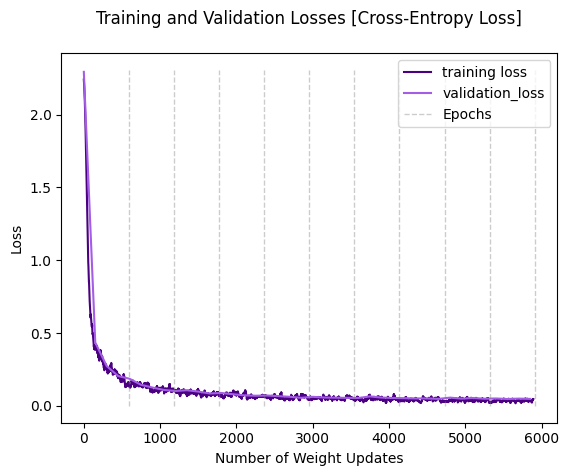

In [25]:
# Plot the training and validation losses.
# Check that there is no overfitting.
# If there is overfitting, you may want to reduce the number of epochs.
# Use a moving average of the training loss to provide a smoother curve. 
# Vertical dashed lines are added to indicate the end of each epoch.


def moving_average(data: List, window: int) -> np.ndarray:
    """
    Calculate the moving average of a list of values.
    Method: convolution.

    Args:
        data (List): List of data points.
        window (int): Size of the moving average window.

    Returns:
        np.ndarray: Moving average values.
    """
    return np.convolve(data, np.ones(window), 'valid') / window



# Calculate the moving average of training losses 
avg_train_losses = moving_average(train_losses, window=20)

# Plot the training and validation losses
plt.plot(
    range(1, len(avg_train_losses)+1),
    avg_train_losses,
    label='training loss',
    color='#4B0082'
)
plt.plot(
    range(1, len(avg_train_losses)+1, hparams['compute_valid_loss_every']),
    valid_losses,
    label='validation_loss',
    color='#A45EE5'
)

# Add vertical lines at the end of each epoch
epochs_x = [
    len(train_loader) * e 
    for e in range(1, hparams['num_epochs']+1)
]
plt.vlines(
    x=epochs_x, 
    ls='--',
    lw=1,
    ymin=0, 
    ymax=train_losses[0],  # Assuming the initial loss is a reasonable upper limit
    alpha=0.4, 
    color='#808080',
    label='Epochs'
)

# Configure plot details
plt.legend()
plt.title('Training and Validation Losses [Cross-Entropy Loss]\n')
plt.xlabel('Number of Weight Updates')
plt.ylabel('Loss')

In [26]:
# Now, let's evaluate the performance of the trained model on the 
# validation set using the classification_report function from scikit-learn. 

# Use the trained model to predict on the validation set without computing gradients
with torch.no_grad():
    y_valid_pred = conv_net(X_valid).max(1)[1]

# Compute the classification report using sklearn
res = classification_report(
    y_true=y_valid.cpu().numpy(),
    y_pred=y_valid_pred.cpu().numpy(),
    labels=range(10),
)

# Print the classification report
print(res)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       415
           1       1.00      0.99      0.99       496
           2       0.99      0.98      0.98       400
           3       0.99      1.00      0.99       417
           4       0.99      0.98      0.99       411
           5       0.99      0.99      0.99       405
           6       0.98      0.99      0.99       390
           7       0.98      0.99      0.98       435
           8       0.98      0.98      0.98       442
           9       0.97      0.98      0.97       389

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



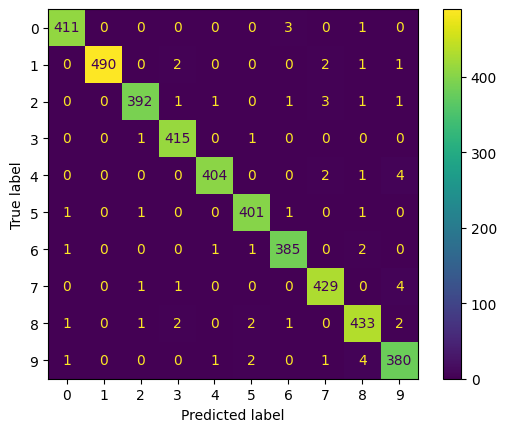

In [27]:
# The Confusion Matrix provides a summary of the model's classification 
# performance, showing the number of true positive, true negative, 
# false positive, and false negative predictions for each class.
# We will use the scikit-learn's `confusion_matrix` function

conf_matrix = confusion_matrix(
    y_true=y_valid.cpu().numpy(), 
    y_pred=y_valid_pred.cpu().numpy()
)
# Visualization:
conf_matrix_disp = ConfusionMatrixDisplay(conf_matrix)
_ = conf_matrix_disp.plot()

# COMMENT: Confusing pairs are (2,7), (8,9), (4,8), (4,9)

# 🧐 Visualizing Misclassified Images 🧐

<div style="border-radius: 10px; border: #710193 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
Understanding which images are misclassified helps in <b>error analysis</b>. It provides insights into the types of <b>patterns or features that are challenging for the model</b>. It also serves as a <i>qualitative assessment</i> of the model's performance beyond numerical metrics (accuracy, precision, recall).<br><br>
When visualizing errors, it's essential to consider the context of the specific image classification task. The interpretation of errors may depend on the <i>application domain</i>, the importance of different classes, and the potential impact of misclassifications.<br><br>
    
In our task, we want to verify that misclassified images are <b>really difficult to classify, even for a human</b>. If that is the case, the model is fine because it means it is failing in cases where even a human would fail.
 </div>

In [28]:
n_misclassified = torch.sum(y_valid_pred != y_valid).item()
print('Number of misclassified Validation images:', n_misclassified)

Number of misclassified Validation images: 60


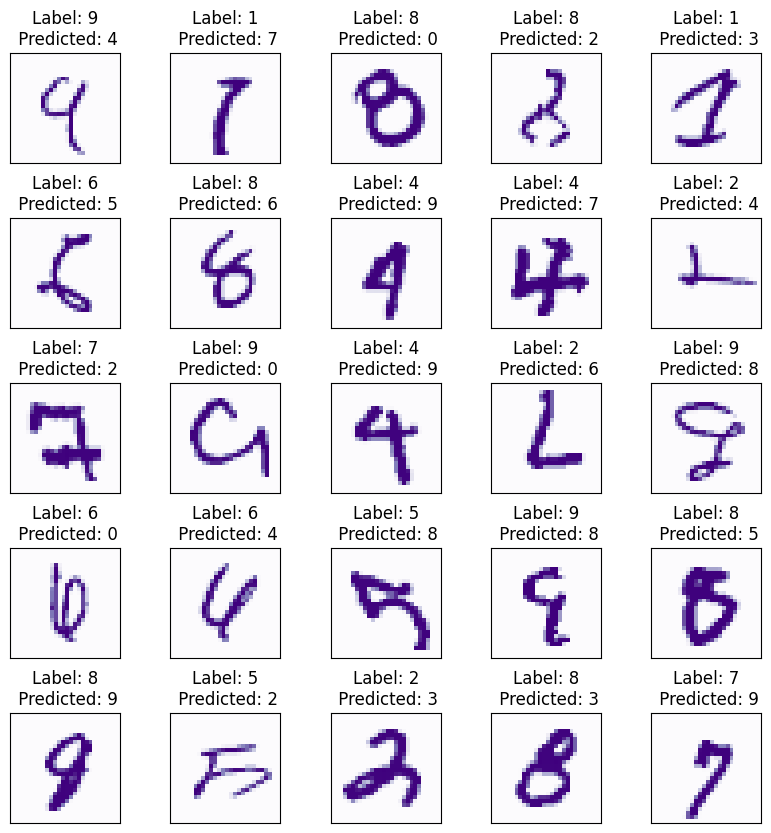

In [29]:
# Set the number of rows and columns for the subplot grid
nrows, ncols = 5, 5
# Here we will visualize 25 errors, but feel free to change this value

# Create a subplot grid for displaying error images
fig, axs = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(10,10)
)
# Adjust the vertical spacing between subplots
fig.subplots_adjust(hspace=0.5)

# Identify the indices where the predicted labels do not match the true labels
errors_idx = torch.where(y_valid_pred != y_valid)[0]

for i in range(ncols*nrows):
    idx = errors_idx[i]  # Get the index of an error
    img = axs[i//ncols, i%nrows].imshow(
        X=X_valid[idx, 0].cpu().numpy(), cmap='Purples'
    )
    
    # Get the true and predicted labels for the error image
    label = y_valid[idx]
    predicted = y_valid_pred[idx]
    
    # Configure subplot settings
    img.axes.get_yaxis().set_visible(False)
    img.axes.get_xaxis().set_visible(False)
    img.axes.set_title(f'Label: {label}\n Predicted: {predicted}')

# NOTE: it seems that a human is also likely to misclassified these images.
# Some of them are very difficult to distinguish.

# 👀 <b>Visualize Convolutional Filters</b> 👀

<div style="border-radius: 10px; border: #710193 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
Visualizing the learned convolutional filters of your convolutional neural network (CNN) can provide valuable insights into <b>how the network is processing and representing features</b> in the input data. Some examples of <i>low-level</i> features are: <b>Edge Detection</b>, <b>Texture Information</b>, <b>basic Patterns and Shapes</b>, etc.<br><br> 
    
Visualizing filters is more common in the early layers of the network where the filters directly interact with the input data. In deeper layers, visualizations become more abstract and may not have a clear interpretation. For this reason, we will just <b>visualize the filters of the first convolutional layer</b>.

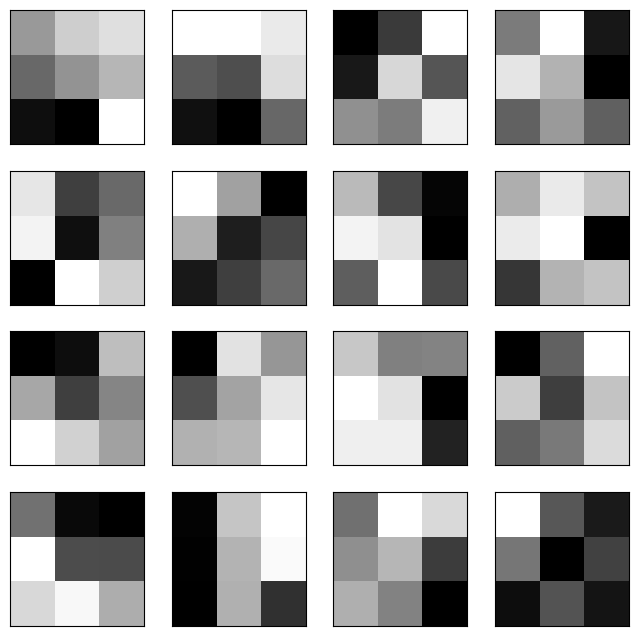

In [30]:
# First, get he filters from the first convolutional layer
filters = conv_net.conv_block[0].weight.data
filters = filters.cpu().numpy().squeeze()

# Since we defined 16 3x3 filters for the first layer,
# we will plot all of them in a 4x4 grid. 
# You may want to change the 'nrows', 'ncols', 'figsize' values
# if you want to plot more filters.
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))

for i, filter_ in enumerate(filters):
    # Transpose the filter to match the usual image orientation
    img = np.transpose(filter_, (1, 0))
    # Normalize the filter values to be in the range [0, 1]
    img = img / (img.max() - img.min())

    # Plot the filter in the corresponding subplot
    axs[i//4, i%4].imshow(img, cmap= 'gray')
    axs[i//4, i%4].set_xticks([])
    axs[i//4, i%4].set_yticks([])

plt.show()

# 🌟 Submission File 🌟

<div style="border-radius: 10px; border: #710193 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    In this section, we will <b>train a new model with the entire training dataset</b> (training subset + validation subset). But before that, we will <b>preprocess the test data</b> applying the exact same preprocessing steps we applied to the training data. Finally, we will create the <b>submission file</b> with the test predictions.
</div>

In [31]:
# Preprocess the Test data
X_test = df_test.values

# Min-Max Scaler
X_min, X_max = X_train_original.min(), X_train_original.max()
X_test = (X_test - X_min) / (X_max - X_min)

# Reshape it to create 28x28 images
X_test = X_test.reshape(-1, 28, 28)

# To Pytorch Tensor
X_test = torch.tensor(data=X_test, dtype=torch.float, device=device)

# Add the channel dimension:
X_test = X_test.unsqueeze(dim=1)

print(X_test.shape)

torch.Size([28000, 1, 28, 28])


In [32]:
# Create a new final_train_loader with 'train_dataset' 
# instead of 'train_subset' 
# Note that train_dataset = train_subset + validation_subset

final_train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=hparams['batch_size'],
    shuffle=True,
)

In [33]:
# Initialize the final model
final_conv_net = MyConvNet(
    conv_block=hparams['conv_block'],
    fc_block=hparams['fc_block']
).to(device)

In [34]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(
    params=final_conv_net.parameters(),
    lr=hparams['learning_rate'],
    weight_decay=hparams['weight_decay'],
)

In [35]:
# Final Training Loop:
# (using final_train_loader and final_conv_net)

final_conv_net.train()

for epoch in range(hparams['num_epochs']):
    print(f'Epoch {epoch+1} / {hparams["num_epochs"]}')
    for i, (X_batch, y_batch) in enumerate(final_train_loader):
        optimizer.zero_grad()
        y_pred = final_conv_net(X_batch)
        batch_loss = criterion(y_pred, y_batch)
        batch_loss.backward()
        optimizer.step()

print('Finished Training!')

Epoch 1 / 10
Epoch 2 / 10
Epoch 3 / 10
Epoch 4 / 10
Epoch 5 / 10
Epoch 6 / 10
Epoch 7 / 10
Epoch 8 / 10
Epoch 9 / 10
Epoch 10 / 10
Finished Training!


In [36]:
# Once the model is trained using the training data,
# make predictions on the test data

final_conv_net.eval()

preds_ = final_conv_net(X_test)
preds = preds_.max(1)[1].cpu().numpy()
print('Test predictions = \n', preds[:100])

Test predictions = 
 [2 0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 2 6 7 6 8 8 3 8 2 1 2 2 0 4 1 7 0 0 0 1 9 0 1 6 5 8 8
 2 8 9 9 2 3 5 4 1 0 9 2 4 3 6 7 2 0 6 6 1 4 3 9 7 4]


In [37]:
# Create a DataFrame with the test predictions
submission = pd.DataFrame({
    'ImageId' : range(1, len(X_test)+1),
    'Label' : preds
})

submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [38]:
# Create the submission file and save it!
# submission.to_csv('submission.csv', index=False)
# print('Your submission file is saved!')

Your submission file is saved!
